Predicting Song Duration


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Loading the dataset
file_path = 'spotify-dataset.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows
print(df.head())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [3]:
# Displaying the data types
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

**DATA PREPROCESSING**

Data preprocessing helps to prepare raw data for effective model training, leading to better performance and more accurate predictions. In our case it ensures that the input features are in a consistent format and range, allowing machine learning models to effectively learn patterns and make accurate predictions on the duration of tracks in the Spotify dataset.

In [4]:
#DATA PREPROCESSING

# Removing rows with any NA values
df.dropna(inplace=True)

# Removing rows with blank strings for string columns
str_columns = df.select_dtypes(include=['object']).columns
df = df[df[str_columns].apply(lambda x: x.str.strip().astype(bool)).all(axis=1)]

# Trimming leading and trailing whitespaces from string columns
df[str_columns] = df[str_columns].apply(lambda x: x.str.strip())

# Dropping the duplicate values starting from column 2 in order to exclude the index
df = df.drop_duplicates(subset=df.columns[1:])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113549 non-null  int64  
 1   track_id          113549 non-null  object 
 2   artists           113549 non-null  object 
 3   album_name        113549 non-null  object 
 4   track_name        113549 non-null  object 
 5   popularity        113549 non-null  int64  
 6   duration_ms       113549 non-null  int64  
 7   explicit          113549 non-null  bool   
 8   danceability      113549 non-null  float64
 9   energy            113549 non-null  float64
 10  key               113549 non-null  int64  
 11  loudness          113549 non-null  float64
 12  mode              113549 non-null  int64  
 13  speechiness       113549 non-null  float64
 14  acousticness      113549 non-null  float64
 15  instrumentalness  113549 non-null  float64
 16  liveness          113549 

**MODEL BUILDING**

In this section, we will initialize and train machine learning models to predict song duration based on various features. We start by defining the predictive features and the target variable, followed by preprocessing steps such as one-hot encoding for categorical variables and splitting the data into training and testing sets.


In [6]:
# Defining the predictive features and target
features = ['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
target = 'duration_ms'

X = df[features]
y = df[target]

# Performing one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['mode', 'explicit', 'track_genre'])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


Standardizing features ensures stablity, efficiency, and effectiveness across different types of machine learning algorithms.

In [7]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Linear Regression Model**

The below code trains a Linear Regression model to predict song duration based on the specified predictive features. It then evaluates the model's performance using mean squared error, R-squared score, and mean absolute error metrics.

In [8]:
# Initializing and training the model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

'''# Optional code to Load the model using pickle file created
with open('linear_regression_model.pkl', 'rb') as file:
    linear_regression_loaded_model = pickle.load(file)'''

# Evaluating the Linear Regression model
linear_pred = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)

# Printing evaluation metrics
print("\nEvaluation Metrics:")
print(f"Mean Squared Error: {linear_mse:.2f}")
print(f"R-squared Score: {linear_r2:.2f}")
print(f"Mean Absolute Error: {linear_mae:.2f}")


Evaluation Metrics:
Mean Squared Error: 9159722574.52
R-squared Score: 0.19
Mean Absolute Error: 52659.01


**Random Forest Regression Model**

The RandomForestRegressor is configured with 30 decision trees(n_estimators) to form a diverse ensemble. n_estimators determines the complexity of the random forest model by setting the number of trees. The random_state parameter, set to 42, ensures consistent results by controlling the random initialization of the trees.

In [9]:
# Initializing and training the model
rf_model = RandomForestRegressor(n_estimators=30, random_state=42)
rf_model.fit(X_train_scaled, y_train)

'''# Optional code to Load the model using pickle file created
with open('random_forest_regression_model.pkl', 'rb') as file:
    random_forest_loaded_model = pickle.load(file)'''
 
# Evaluating the Random Forest Regression model
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared Score: {rf_r2:.2f}")
print(f"Mean Absolute Error: {rf_mae:.2f}")



Evaluation Metrics:
Mean Squared Error: 7880851893.50
R-squared Score: 0.30
Mean Absolute Error: 41440.12


**Gradient Boosting Regression Model**

The GradientBoostingRegressor model is initialized with 30 boosting stages (n_estimators) for sequential training of decision trees. The random_state parameter, set to 42, ensures reproducibility of results during model initialization.

In [10]:
# Initializing and training the model
gb_model = GradientBoostingRegressor(n_estimators=30, random_state=42)
gb_model.fit(X_train_scaled, y_train)

'''# Optional code to Load the model using pickle file created
with open('gradient_boosting_regression_model.pkl', 'rb') as file:
    gradient_boosting_loaded_model = pickle.load(file)'''

# Evaluating Gradient Boosting Regression model
gb_pred = gb_model.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

# Printing evaluation metrics
print("\nEvaluation Metrics:")
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"R-squared Score: {gb_r2:.2f}")
print(f"Mean Absolute Error: {gb_mae:.2f}")



Evaluation Metrics:
Mean Squared Error: 9811373756.36
R-squared Score: 0.13
Mean Absolute Error: 56347.85


**MODEL EVALUATION**

This code block visualizes the evaluation metrics (Mean Squared Error, R-squared Score, and Mean Absolute Error) for three different regression models: Linear Regression, Random Forest Regression, and Gradient Boosting Regression, using bar plots for a comparative analysis. It then identifies and displays the best performing model based on the lowest Mean Squared Error (MSE), alongside its corresponding R2 Score and Mean Absolute Error (MAE), enabling an informed decision on model selection for predictive accuracy and efficiency.

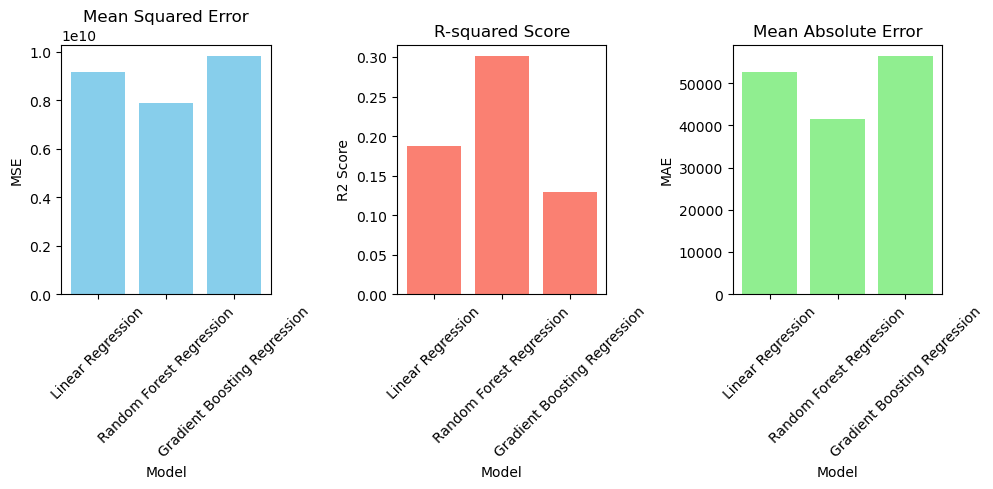

Best Model based on Evaluation Metrics:
Model: Random Forest Regression
MSE: 7880851893.50
R2 Score: 0.30
MAE: 41440.12


In [13]:
# Block 8: Visualizing results and comparing models
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for all models
models = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
mses = [linear_mse, rf_mse, gb_mse]
r2_scores = [linear_r2, rf_r2, gb_r2]
maes = [linear_mae, rf_mae, gb_mae]

# Plotting evaluation metrics
plt.figure(figsize=(10, 5))

# Mean Squared Error
plt.subplot(1, 3, 1)
plt.bar(models, mses, color='skyblue')
plt.title('Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# R-squared Score
plt.subplot(1, 3, 2)
plt.bar(models, r2_scores, color='salmon')
plt.title('R-squared Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

# Mean Absolute Error
plt.subplot(1, 3, 3)
plt.bar(models, maes, color='lightgreen')
plt.title('Mean Absolute Error')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Compare models based on evaluation metrics
best_model_index = np.argmin(mses)  # Select model with lowest MSE as the best model

print("Best Model based on Evaluation Metrics:")
print(f"Model: {models[best_model_index]}")
print(f"MSE: {mses[best_model_index]:.2f}")
print(f"R2 Score: {r2_scores[best_model_index]:.2f}")
print(f"MAE: {maes[best_model_index]:.2f}")


**INSIGHTS AND RECOMMENDATIONS**

The Random Forest Regression model outperforms others with the lowest Mean Squared Error (MSE), a moderate R2 score, and a low Mean Absolute Error (MAE), making it the best choice for accurately predicting durations. The Random Forest Regression model for predicting song duration offers significant advantages for playlist curation and monetization in the music streaming industry.

Business Insights:

1. Enhanced Playlist Curation: With duration predictions, Spotify can craft playlists that match user preferences more closely, improving user experience and retention.
2. Strategic Ad Placement: Predictive insights on song durations enable smarter ad insertions into playlists, optimizing monetization without disrupting the listening experience.

Recommendations:

1. Integrate Predictions into Artist Tools: Provide analytics tools for artists on Spotify. Artists can then give their genre and song features to get optimal duration for their tracks.
2. Dynamic Playlist Adjustment: Predictive modeling can be used to adjust playlists in real-time, ensuring seamless transitions and listener satisfaction.
3. Ad Strategy Optimization: Implement duration prediction to refine ad timing, balancing revenue generation with user experience.

Leveraging the Random Forest model for song duration prediction can lead to improved content creation, playlist curation, and monetization strategies, driving value for artists and, streaming platforms.

In [ ]:
import pickle

# Saving all the three models using pickle library

with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)
with open('random_forest_regression_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
with open('gradient_boosting_regression_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)
    